## Stock Prediction and Forecasting Using Stacked LSTM

**Netflix is one of the most popular OTT streaming platforms. It offers a vast collection of television series and films and owns its productions known as Netflix Originals. People who are highly active in stock market investments always keep an eye on companies like Netflix because of its popularity. If you are one of them who would like to learn about how to predict the stock prices of Netflix with machine learning, this article is for you. In this article, I will take you through the task of Netflix stock price prediction with Machine Learning using Python.**

Yahoo Finance is one of the most popular websites to collect stock price data. You need to visit the website, enter the company’s name or stock symbol, and you can easily download the dataset. But if you want to get the latest dataset every time you are running your code, you need to use the yfinance API. yfinance is an API provided by Yahoo Finance to collect the latest stock price data.

To use this API, you need to install it by using the pip command in your terminal or command prompt as mentioned below:

-> !pip install yfinance

In [ ]:
!pip install yfinance

I hope you have easily installed this API. Now below is how you can get the latest stock price data using Python:

## 1. Import all the dependencies

Netflix Stock Price Prediction with Machine Learning:-
To predict the stock prices of Netflix with machine learning, I will be using the LSTM neural network as it is one of the best approaches for regression analysis and time series forecasting. So here, I will start by importing the necessary Python libraries and collecting the latest stock price data of Netflix:

In [40]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from datetime import date
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd

import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [4]:
data = yf.download('NFLX', start=start_date, end=end_date, progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-07  492.920013  496.700012  490.549988  494.660004  494.660004   
2021-06-08  497.000000  498.820007  489.369995  492.390015  492.390015   
2021-06-09  494.500000  496.089996  484.649994  485.809998  485.809998   
2021-06-10  487.170013  490.209991  482.140015  487.269989  487.269989   
2021-06-11  490.000000  491.410004  487.779999  488.769989  488.769989   

             Volume  
Date                 
2021-06-07  2791900  
2021-06-08  2374000  
2021-06-09  3055000  
2021-06-10  4382900  
2021-06-11  3124000  


The above code will collect the stock price data from today to the last 360 days. In this dataset, Date is not a column, it’s the index of this dataset. To use this data for any data science task, we need to convert this index into a column. Below is how you can do that:

In [5]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2021-06-07  492.920013  496.700012  490.549988  494.660004  494.660004   
1 2021-06-08  497.000000  498.820007  489.369995  492.390015  492.390015   
2 2021-06-09  494.500000  496.089996  484.649994  485.809998  485.809998   
3 2021-06-10  487.170013  490.209991  482.140015  487.269989  487.269989   
4 2021-06-11  490.000000  491.410004  487.779999  488.769989  488.769989   

    Volume  
0  2791900  
1  2374000  
2  3055000  
3  4382900  
4  3124000  


So as you can see, the final dataset is just like the dataset that we download from Yahoo Finance. This is how we can get stock price data using Python.

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-07,492.920013,496.700012,490.549988,494.660004,494.660004,2791900
1,2021-06-08,497.000000,498.820007,489.369995,492.390015,492.390015,2374000
2,2021-06-09,494.500000,496.089996,484.649994,485.809998,485.809998,3055000
3,2021-06-10,487.170013,490.209991,482.140015,487.269989,487.269989,4382900
4,2021-06-11,490.000000,491.410004,487.779999,488.769989,488.769989,3124000


In [7]:
data.shape # check the shape of the data

(249, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   Open       249 non-null    float64       
 2   High       249 non-null    float64       
 3   Low        249 non-null    float64       
 4   Close      249 non-null    float64       
 5   Adj Close  249 non-null    float64       
 6   Volume     249 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


## 2. EDA
Now let’s visualize the stock price data of Netflix by using a candlestick chart as it gives a clear picture of the increase and decrease of stock prices:

In [19]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"], open=data["Open"], high=data["High"], low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

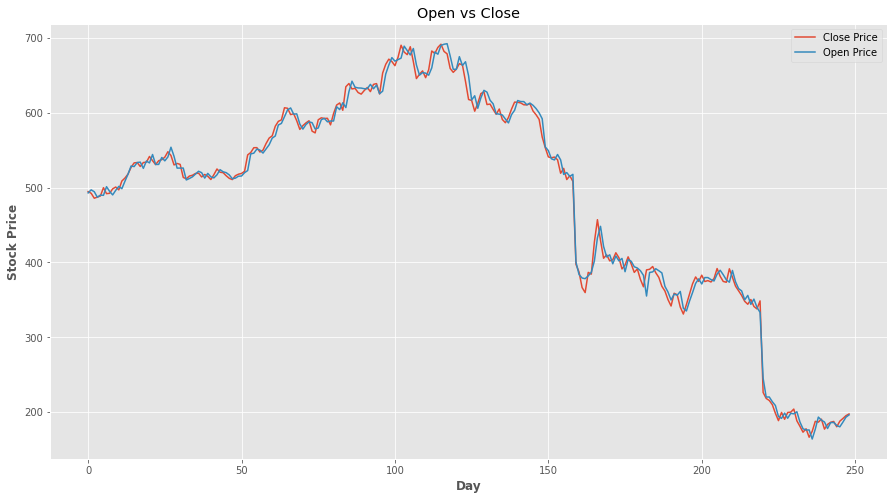

In [18]:
plt.style.use("ggplot")
plt.figure(figsize = [15,8])
plt.plot(data["Close"], label="Close Price")
plt.plot(data["Open"], label="Open Price")
plt.title("Open vs Close")
plt.xlabel("Day", weight="bold")
plt.ylabel("Stock Price", weight="bold")
plt.legend()
plt.show()

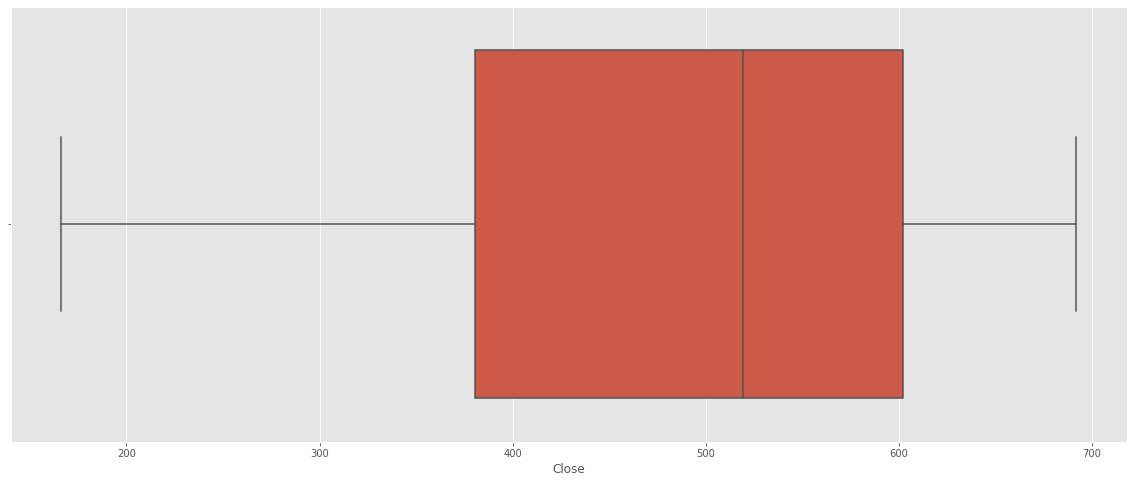

In [20]:
# check the outlier for close prise
plt.figure(figsize=(20,8))
sns.boxplot(data['Close'])

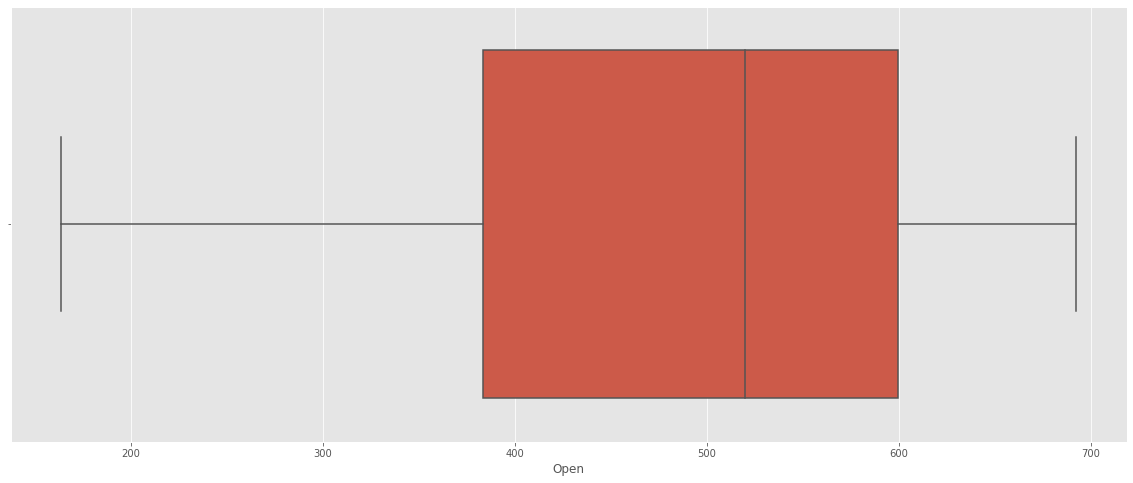

In [21]:
# check the outlier for open prise 
plt.figure(figsize=(20,8))
sns.boxplot(data['Open'])

Now let’s have a look at the correlation of all the columns with the Close column:

In [33]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
Low          0.999145
High         0.999069
Open         0.997931
Volume      -0.427892
Name: Close, dtype: float64


## Training LSTM for Netflix Stock Price Prediction

In [36]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [38]:
x.shape

(249, 4)

In [39]:
y.shape

(249, 1)

### 3. Perform Feature Scaling

In [53]:
# we will select the close prise variable for time series forecasting 
Close = data["Close"]
Close

0      494.660004
1      492.390015
2      485.809998
3      487.269989
4      488.769989
          ...    
244    180.339996
245    187.830002
246    191.399994
247    195.190002
248    197.440002
Name: Close, Length: 249, dtype: float64

In [ ]:
# transform values in the range of 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
Close_scaled =scaler.fit_transform(np.array(Close).reshape(-1,1))
Close_scaled

### 3. Preprocess the Data in Train and Test splits

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
print(xtrain.shape), print(ytrain.shape)

(199, 4)
(199, 1)


(None, None)

In [44]:
print(xtest.shape), print(ytest.shape)

(50, 4)
(50, 1)


(None, None)

Now I will prepare the LSTM neural network architecture:

In [45]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


**Now here’s how we can train an LSTM neural network model for predicting the stock prices of Netflix using Python:**

In [49]:
EPOCHS = 50
model.compile(optimizer='adam', loss='mean_squared_error')
H = model.fit(xtrain, ytrain, batch_size=1, epochs=EPOCHS, verbose=1)

Epoch 1/50
199/199 [==============================] - 3s 4ms/step - loss: 146.3153
Epoch 2/50
199/199 [==============================] - 1s 4ms/step - loss: 170.7045
Epoch 3/50
199/199 [==============================] - 1s 4ms/step - loss: 197.6820
Epoch 4/50
199/199 [==============================] - 1s 4ms/step - loss: 266.9829
Epoch 5/50
199/199 [==============================] - 1s 4ms/step - loss: 157.3129
Epoch 6/50
199/199 [==============================] - 1s 4ms/step - loss: 243.6551
Epoch 7/50
199/199 [==============================] - 1s 4ms/step - loss: 374.7539
Epoch 8/50
199/199 [==============================] - 1s 4ms/step - loss: 409.9038
Epoch 9/50
199/199 [==============================] - 1s 4ms/step - loss: 154.7334
Epoch 10/50
199/199 [==============================] - 1s 4ms/step - loss: 168.8013
Epoch 11/50
199/199 [==============================] - 1s 4ms/step - loss: 108.3427
Epoch 12/50
199/199 [==============================] - 1s 4ms/step - loss: 147.6889
E

Now let’s test the model by giving the inputs according to the features that we used to train this model for predicting the final results:

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(xtrain)
test_predict=model.predict(xtest)

In [55]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [56]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

261292.1112798646

In [64]:
features = np.array([[401.970001, 427.700012, 398.200012, 20047500]])
model.predict(features)

array([[379.95227]], dtype=float32)

So this is how we can train an LSTM neural network model for the task of Netflix stock price prediction with machine learning using Python.



**Summary**

So this is how we can use machine learning to predict the stock prices of Netflix. Netflix is one of the most popular OTT streaming platforms. People who are highly active in stock market investments always keep an eye on companies like Netflix because of its popularity. I hope you liked this article on the task of Netflix stock price prediction with machine learning using Python.